# Importing libraries and dataset

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Basic data exploration
The y_train and y_test sginify what type of clothing is on the images in X_train and X_test, numbers in those columns represent:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
print(y_train.shape)

(60000,)


In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [6]:
print(y_train[0])

9


<Axes: >

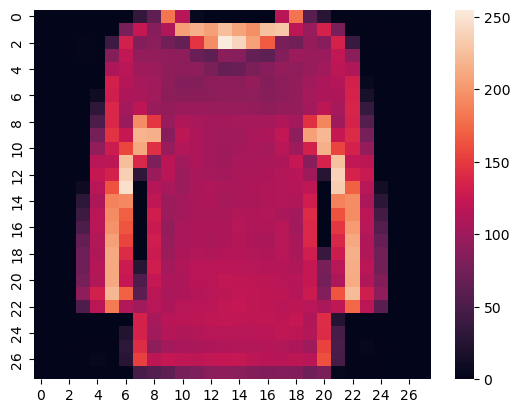

In [7]:
sns.heatmap(X_train[6321])

# Data preparation

Normalization of data

In [8]:
X_test = X_test/255
X_train = X_train/255

In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

<Axes: >

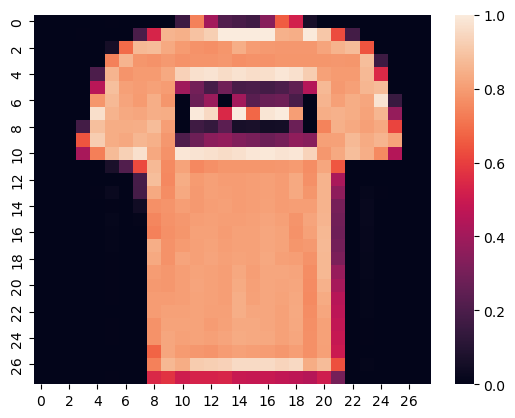

In [10]:
sns.heatmap(X_train[1])

Now we flatten the image, so that in can be inputed to neural network

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_train_flat = X_train.reshape(60000,784)
X_test_flat = X_test.reshape(10000,784)

Now we need to one code the label

In [14]:
y_train = pd.get_dummies(y_train)
y_train.columns = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle_boot"]
y_train.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle_boot
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [15]:
y_test = pd.get_dummies(y_test)
y_test.columns = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle_boot"]
y_test.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle_boot
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


# Basic neural networks

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,InputLayer, BatchNormalization,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

First model, rectified linear unit as activation function, one dropout layer

In [17]:
model1 = Sequential()
model1.add(InputLayer(784))

model1.add(Dense(128,activation = "relu"))
model1.add(BatchNormalization())

model1.add(Dense(128,activation = "relu"))
model1.add(BatchNormalization())

model1.add(Dense(128,activation = "relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(units=10, activation='softmax'))
model1.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [18]:
model1.fit(X_train_flat, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test_flat, y_test))

Epoch 1/15
469/469 [==============================] - 5s 8ms/step - loss: 0.5187 - accuracy: 0.8173 - val_loss: 0.4535 - val_accuracy: 0.8375
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.3821 - accuracy: 0.8614 - val_loss: 0.4399 - val_accuracy: 0.8452
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.3410 - accuracy: 0.8755 - val_loss: 0.3654 - val_accuracy: 0.8696
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.3211 - accuracy: 0.8835 - val_loss: 0.3838 - val_accuracy: 0.8580
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.3045 - accuracy: 0.8874 - val_loss: 0.4202 - val_accuracy: 0.8523
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2881 - accuracy: 0.8936 - val_loss: 0.3360 - val_accuracy: 0.8753
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2784 - accuracy: 0.8971 - val_loss: 0.4028 - val_accuracy: 0.8609
Epoch 

In [19]:
pred = model1.predict(X_test_flat)
pred = [np.argmax(i) for i in pred ]

In [20]:
pred = [np.argmax(i) for i in pred ]


In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

Making predictions, and converting to categorical values from propability

In [22]:
predictions = model1.predict(X_test_flat)
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

In [23]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       816
           1       0.97      0.99      0.98       976
           2       0.73      0.85      0.79       862
           3       0.91      0.85      0.88      1070
           4       0.72      0.85      0.78       857
           5       0.94      0.99      0.96       950
           6       0.73      0.66      0.70      1097
           7       0.98      0.93      0.95      1051
           8       0.97      0.97      0.97       997
           9       0.96      0.97      0.96       995

   micro avg       0.86      0.89      0.88      9671
   macro avg       0.86      0.89      0.88      9671
weighted avg       0.87      0.89      0.88      9671
 samples avg       0.86      0.86      0.86      9671



D:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Secound model tanh as activation function, one dropout layer

In [24]:
model2 = Sequential()
model2.add(InputLayer(784))

model2.add(Dense(128,activation = "tanh"))
model2.add(BatchNormalization())

model2.add(Dense(128,activation = "tanh"))
model2.add(BatchNormalization())

model2.add(Dense(128,activation = "tanh"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(units=10, activation='softmax'))
model2.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [26]:
model2.fit(X_train_flat, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test_flat, y_test))

Epoch 1/15
469/469 [==============================] - 4s 8ms/step - loss: 0.5254 - accuracy: 0.8163 - val_loss: 0.4086 - val_accuracy: 0.8562
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.3850 - accuracy: 0.8602 - val_loss: 0.3853 - val_accuracy: 0.8614
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3384 - accuracy: 0.8766 - val_loss: 0.3865 - val_accuracy: 0.8505
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.3118 - accuracy: 0.8865 - val_loss: 0.3741 - val_accuracy: 0.8583
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.2921 - accuracy: 0.8935 - val_loss: 0.3565 - val_accuracy: 0.8685
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2789 - accuracy: 0.8981 - val_loss: 0.3769 - val_accuracy: 0.8638
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.2653 - accuracy: 0.9022 - val_loss: 0.3286 - val_accuracy: 0.8809
Epoch 

In [27]:
predictions = model1.predict(X_test_flat)
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

In [28]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       816
           1       0.97      0.99      0.98       976
           2       0.73      0.85      0.79       862
           3       0.91      0.85      0.88      1070
           4       0.72      0.85      0.78       857
           5       0.94      0.99      0.96       950
           6       0.73      0.66      0.70      1097
           7       0.98      0.93      0.95      1051
           8       0.97      0.97      0.97       997
           9       0.96      0.97      0.96       995

   micro avg       0.86      0.89      0.88      9671
   macro avg       0.86      0.89      0.88      9671
weighted avg       0.87      0.89      0.88      9671
 samples avg       0.86      0.86      0.86      9671



D:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Convolutional Neural Network

In [29]:
from tensorflow.keras.callbacks import TensorBoard

In [30]:
arch = 'CNN_1'
tb = TensorBoard(log_dir='logs/' + arch)

Reshaping data to fit CNN

In [31]:
X_test.shape

(10000, 28, 28)

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000, 28, 28,1)

In [34]:
X_train[0].shape

(28, 28, 1)

First CNN with 3 convolutional layers, increasing the number of filters, with padding, becouse data does touch the edges 

In [35]:

model3 = Sequential()

model3.add(InputLayer((28,28,1)))

model3.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model3.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model3.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model3.add(MaxPooling2D(pool_size=(3, 3)))


model3.add(Flatten()) 

model3.add(Dense(128,activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

model3.add(Dense(units=10, activation='softmax'))
model3.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [36]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)              

In [37]:
model3.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test))

Epoch 1/15
469/469 [==============================] - 7s 9ms/step - loss: 0.4609 - accuracy: 0.8366 - val_loss: 0.4342 - val_accuracy: 0.8554
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3085 - accuracy: 0.8885 - val_loss: 0.3600 - val_accuracy: 0.8695
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2566 - accuracy: 0.9073 - val_loss: 0.3086 - val_accuracy: 0.8905
Epoch 4/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2202 - accuracy: 0.9193 - val_loss: 0.2860 - val_accuracy: 0.9001
Epoch 5/15
469/469 [==============================] - 4s 10ms/step - loss: 0.1979 - accuracy: 0.9269 - val_loss: 0.2995 - val_accuracy: 0.8944
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.1703 - accuracy: 0.9384 - val_loss: 0.2950 - val_accuracy: 0.8952
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.1516 - accuracy: 0.9452 - val_loss: 0.3861 - val_accuracy: 0.8844
Epoc

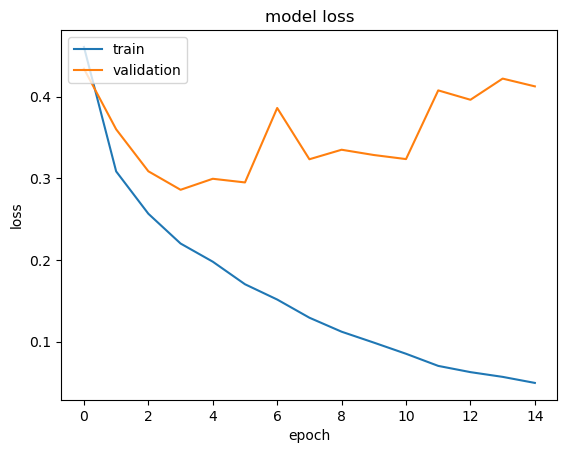

In [38]:
plt.plot(model3.history.history['loss'])
plt.plot(model3.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Since the model is overtraning I'll add dropout to convolutional layers

In [39]:
model4 = Sequential()

model4.add(InputLayer((28,28,1)))

model4.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model4.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model4.add(Dropout(0.4))

model4.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model4.add(Dropout(0.4))
model4.add(MaxPooling2D(pool_size=(3, 3)))


model4.add(Flatten()) 

model4.add(Dense(128,activation = "relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))

model4.add(Dense(units=10, activation='softmax'))
model4.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [40]:
model4.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test),callbacks=[tb])

Epoch 1/15
469/469 [==============================] - 6s 10ms/step - loss: 0.6470 - accuracy: 0.7681 - val_loss: 0.5352 - val_accuracy: 0.8247
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.4271 - accuracy: 0.8464 - val_loss: 0.3895 - val_accuracy: 0.8632
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3756 - accuracy: 0.8650 - val_loss: 0.3509 - val_accuracy: 0.8762
Epoch 4/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3461 - accuracy: 0.8756 - val_loss: 0.3360 - val_accuracy: 0.8773
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3248 - accuracy: 0.8838 - val_loss: 0.3040 - val_accuracy: 0.8908
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3059 - accuracy: 0.8897 - val_loss: 0.2907 - val_accuracy: 0.8949
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2948 - accuracy: 0.8944 - val_loss: 0.2974 - val_accuracy: 0.8904
Epo

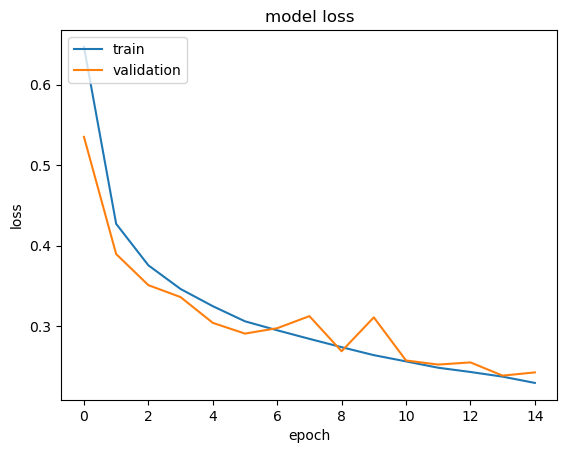

In [41]:
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Second CNN with 3 convolutional and 2 deep layers 

In [42]:
arch = 'CNN_2'
tb = TensorBoard(log_dir='logs/' + arch)

In [43]:
model5 = Sequential()

model5.add(InputLayer((28,28,1)))

model5.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model5.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model5.add(Dropout(0.4))

model5.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model5.add(Dropout(0.4))
model5.add(MaxPooling2D(pool_size=(3, 3)))


model5.add(Flatten()) 

model5.add(Dense(128,activation = "relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))


model5.add(Dense(128,activation = "relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))

model5.add(Dense(units=10, activation='softmax'))
model5.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [44]:
model5.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test),callbacks=[tb])

Epoch 1/15
469/469 [==============================] - 7s 14ms/step - loss: 0.8800 - accuracy: 0.6891 - val_loss: 0.6403 - val_accuracy: 0.7559
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.5132 - accuracy: 0.8169 - val_loss: 0.4101 - val_accuracy: 0.8459
Epoch 3/15
469/469 [==============================] - 5s 11ms/step - loss: 0.4358 - accuracy: 0.8440 - val_loss: 0.3571 - val_accuracy: 0.8711
Epoch 4/15
469/469 [==============================] - 5s 11ms/step - loss: 0.3900 - accuracy: 0.8624 - val_loss: 0.3616 - val_accuracy: 0.8673
Epoch 5/15
469/469 [==============================] - 5s 11ms/step - loss: 0.3668 - accuracy: 0.8705 - val_loss: 0.3148 - val_accuracy: 0.8862
Epoch 6/15
469/469 [==============================] - 5s 11ms/step - loss: 0.3412 - accuracy: 0.8783 - val_loss: 0.3180 - val_accuracy: 0.8880
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3257 - accuracy: 0.8856 - val_loss: 0.2725 - val_accuracy: 0.9020

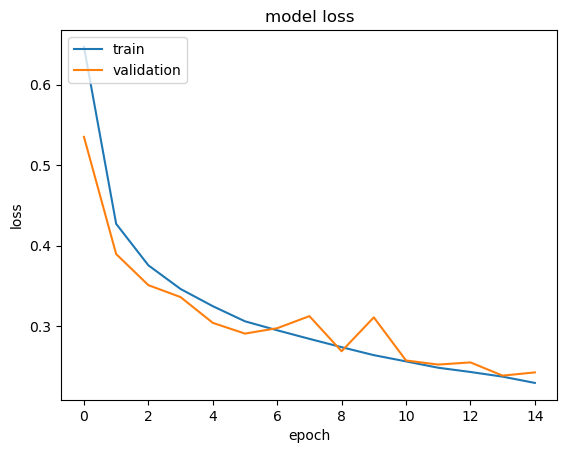

In [45]:
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Third CNN with 4 convolutional and 1 deep layer 

In [46]:
arch = 'CNN_3'
tb = TensorBoard(log_dir='logs/' + arch)

In [47]:
model6 = Sequential()

model6.add(InputLayer((28,28,1)))

model6.add(Conv2D(32, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model6.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model6.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model6.add(Dropout(0.4))

model6.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model6.add(Dropout(0.4))
model6.add(MaxPooling2D(pool_size=(2, 2)))


model6.add(Flatten()) 

model6.add(Dense(128,activation = "relu"))
model6.add(BatchNormalization())
model6.add(Dropout(0.4))

model6.add(Dense(units=10, activation='softmax'))
model6.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [48]:
model6.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test),callbacks=[tb])

Epoch 1/15
469/469 [==============================] - 6s 12ms/step - loss: 0.6085 - accuracy: 0.7837 - val_loss: 0.5143 - val_accuracy: 0.8448
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3932 - accuracy: 0.8575 - val_loss: 0.3446 - val_accuracy: 0.8742
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3359 - accuracy: 0.8790 - val_loss: 0.3070 - val_accuracy: 0.8863
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3019 - accuracy: 0.8903 - val_loss: 0.2860 - val_accuracy: 0.8944
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2800 - accuracy: 0.8996 - val_loss: 0.2697 - val_accuracy: 0.9020
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2614 - accuracy: 0.9068 - val_loss: 0.2625 - val_accuracy: 0.9012
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2473 - accuracy: 0.9102 - val_loss: 0.2648 - val_accuracy: 0.9041
Epoch

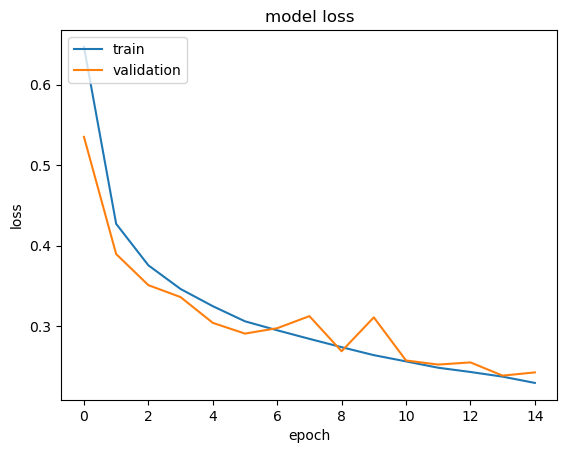

In [49]:
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# Model evaluation

In [60]:
%load_ext tensorboard
%tensorboard --logdir logs --port 5050

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In tensorboard we see that third CNN which is 6th model performs the best, will test it further

In [51]:
predictions = model6.predict(X_test)

In [52]:
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

In [53]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       949
           1       0.98      0.99      0.99       989
           2       0.89      0.87      0.88      1019
           3       0.91      0.94      0.93       963
           4       0.86      0.88      0.87       979
           5       0.99      0.98      0.98      1008
           6       0.72      0.81      0.77       894
           7       0.97      0.96      0.97      1011
           8       0.98      0.98      0.98      1002
           9       0.96      0.98      0.97       982

   micro avg       0.91      0.93      0.92      9796
   macro avg       0.91      0.93      0.92      9796
weighted avg       0.91      0.93      0.92      9796
 samples avg       0.91      0.91      0.91      9796



D:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print(confusion_matrix(predictions.argmax(axis=1),np.array(y_test).argmax(axis=1)))

[[889   5  38  34  38   2 139   0   7   1]
 [  0 981   1   5   1   0   1   0   0   0]
 [ 12   0 885  12  53   0  56   0   1   0]
 [  7   9   6 908  14   0  17   0   2   0]
 [  2   3  36  23 860   0  53   0   2   0]
 [  1   0   0   0   0 986   0  14   3   4]
 [ 84   0  32  18  33   0 725   0   1   1]
 [  0   0   0   0   0   6   0 973   1  31]
 [  5   2   2   0   1   0   9   0 983   0]
 [  0   0   0   0   0   6   0  13   0 963]]


It seems that our model has problem with classfing some of the numbers, lets make a list of those

In [55]:
obj_list = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle_boot"]

In [56]:
false_predictions = [i for i in range(len(predictions.argmax(axis=1)))
                     if predictions.argmax(axis=1)[i] != np.array(y_test).argmax(axis=1)[i]]

In [57]:
X_test = X_test.reshape(10000, 28, 28)

True value :  Sneaker
Predicted value :  Sandal


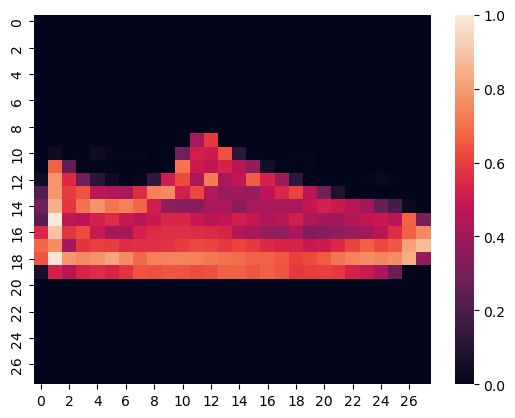

True value :  Coat
Predicted value :  Shirt


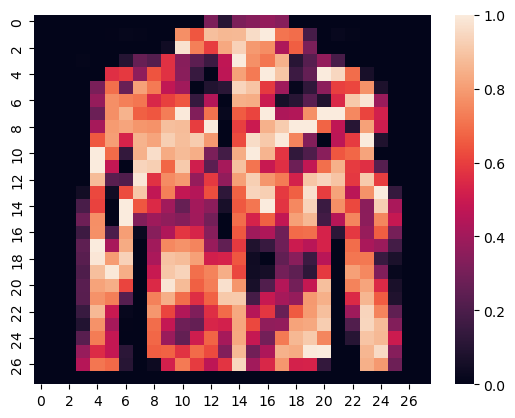

True value :  Ankle_boot
Predicted value :  Sandal


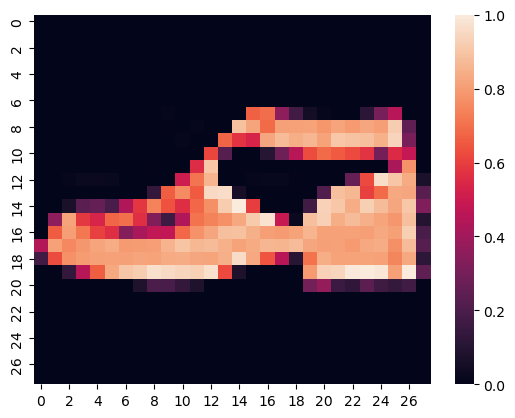

True value :  Coat
Predicted value :  Pullover


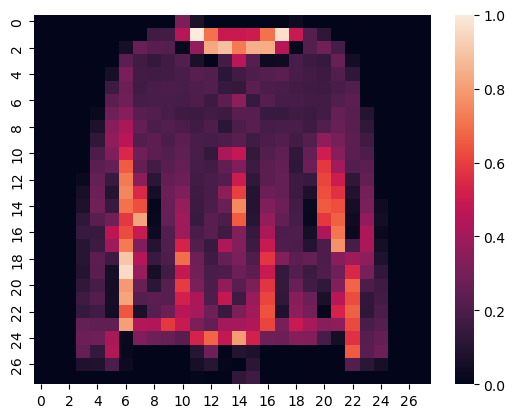

True value :  Dress
Predicted value :  Coat


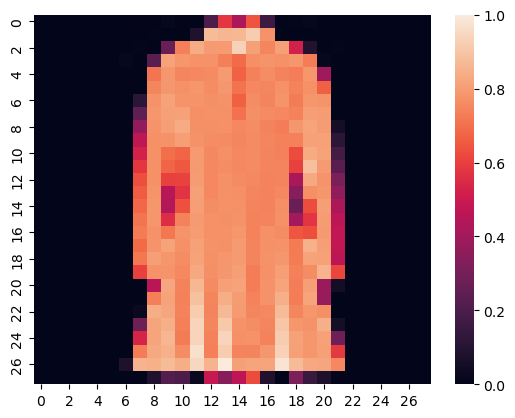

True value :  Dress
Predicted value :  Trouser


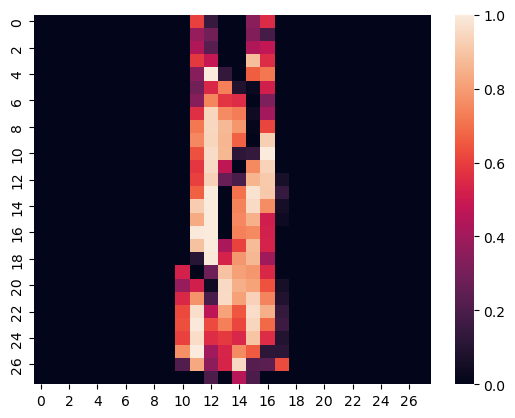

True value :  Shirt
Predicted value :  T-shirt/top


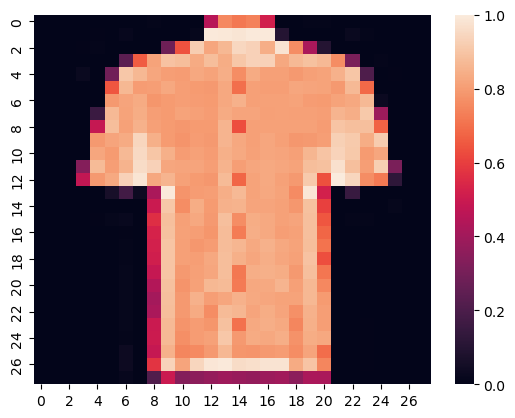

True value :  Dress
Predicted value :  Shirt


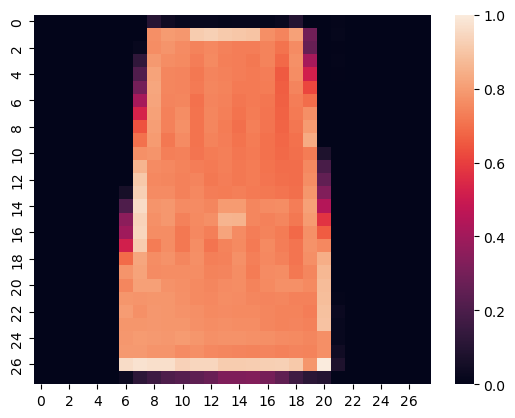

True value :  Pullover
Predicted value :  T-shirt/top


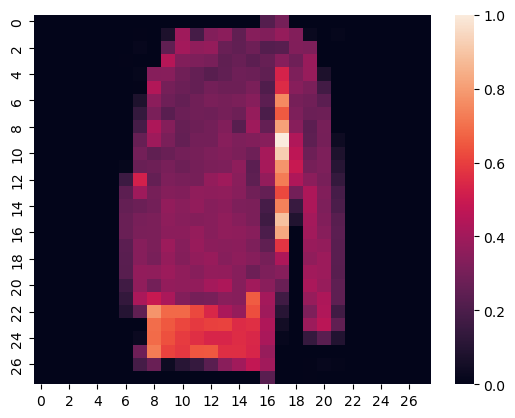

True value :  Dress
Predicted value :  Coat


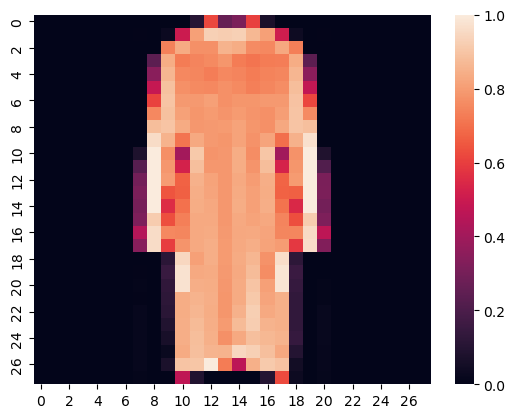

In [58]:
for i in range(0,10):
    j = false_predictions[i]
    sns.heatmap(X_test[j])
    print("True value : ",obj_list[np.array(y_test).argmax(axis=1)[j]])
    print("Predicted value : ",obj_list[predictions.argmax(axis=1)[j]])
    plt.show()

# Data augmentation

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
X_test.shape

(10000, 28, 28)

In [63]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    validation_split=0.2)

datagen.fit(X_test.reshape(10000,28,28,1))

In [64]:
def im_aug(image):
    aug = datagen.flow(image.reshape(1,28,28,1))
    return aug[0][0]

In [66]:
X_test_aug = [im_aug(i) for i in X_test] 

Base image


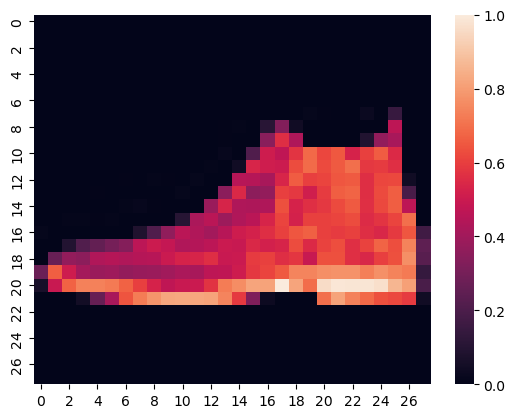

Augmented


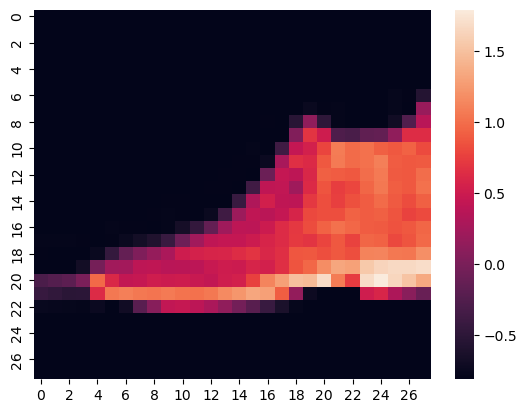

Base image


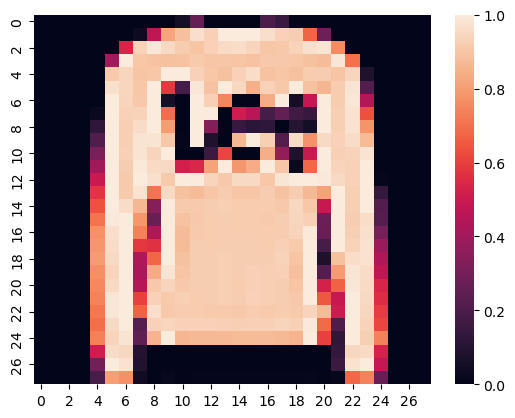

Augmented


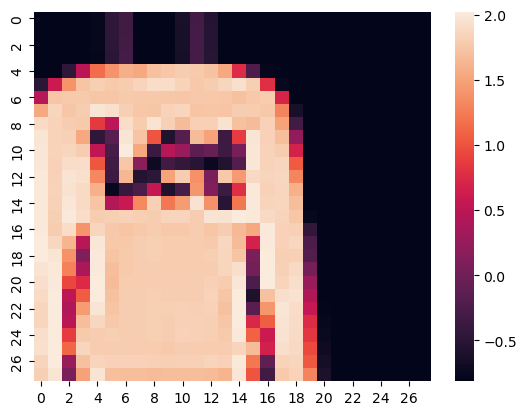

Base image


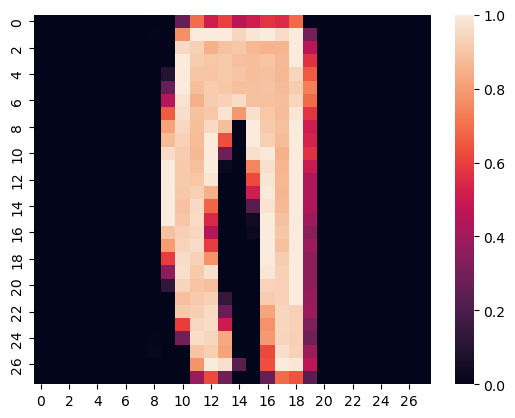

Augmented


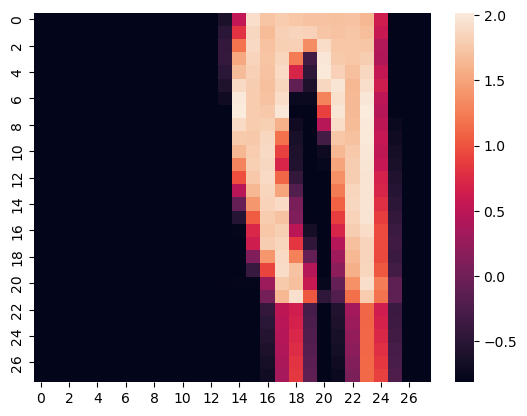

Base image


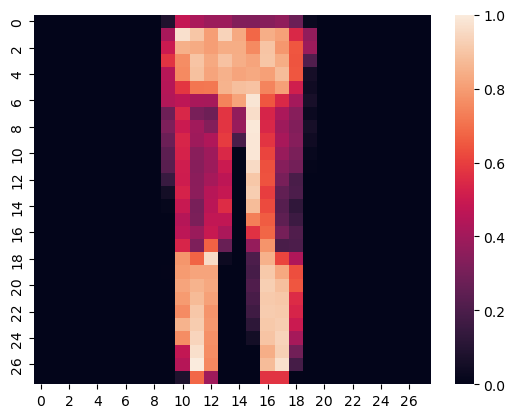

Augmented


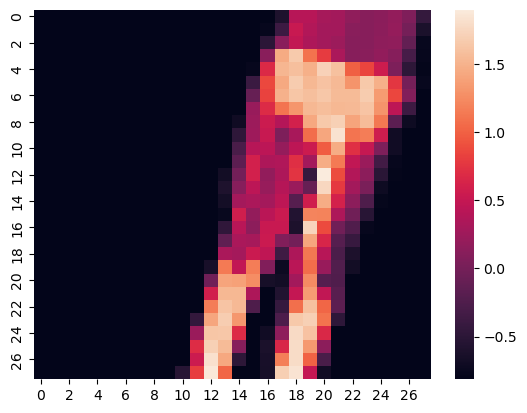

Base image


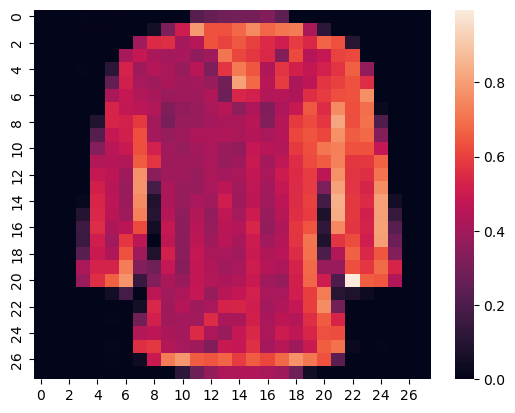

Augmented


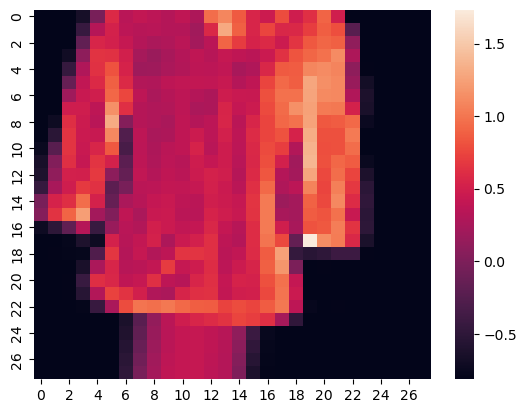

In [67]:
for i in range(0,5):
    print("Base image")
    sns.heatmap(X_test[i].reshape(28, 28))
    plt.show()
    print("Augmented")
    sns.heatmap(X_test_aug[i].reshape(28, 28))
    plt.show()

In [73]:
np.array(X_test_aug).shape

(10000, 28, 28, 1)

In [89]:
model1.evaluate(np.array(X_test_aug).reshape(10000,784),y_test)
model6.evaluate(np.array(X_test_aug),y_test)


313/313 [==============================] - 1s 3ms/step - loss: 33.3624 - accuracy: 0.2201


[33.36235809326172, 0.22010000050067902]